In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns #--> aliases

In [2]:
complaints=pd.read_csv(r'C:\Users\jayac\Downloads\Dataset\Consumer_Complaints.csv')

In [3]:
complaints.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,759217
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/2014,Closed with explanation,Yes,Yes,885638
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/2014,Closed with explanation,Yes,Yes,1027760


In [184]:
complaints.shape

(903983, 22)

In [4]:
complaints.isna().sum()

Date received                        0
Product                              0
Sub-product                     235160
Issue                                0
Sub-issue                       477597
Consumer complaint narrative    704013
Company public response         646002
Company                              0
State                             9225
ZIP code                          9278
Tags                            777945
Consumer consent provided?      528549
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?              135408
Complaint ID                         0
dtype: int64

In [5]:
mode_1= complaints['Consumer disputed?'].mode()

In [6]:
mode_1

0    No
dtype: object

In [7]:
complaints['Consumer disputed?'].fillna('NO', inplace=True)


In [8]:
complaints.isna().sum()

Date received                        0
Product                              0
Sub-product                     235160
Issue                                0
Sub-issue                       477597
Consumer complaint narrative    704013
Company public response         646002
Company                              0
State                             9225
ZIP code                          9278
Tags                            777945
Consumer consent provided?      528549
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [9]:
complaints.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [10]:
complaints[['Date received', 'Product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
        'Consumer consent provided?',
       'Submitted via', 'Company response to consumer',
      ]].describe().transpose()

,count,unique,top,freq
Date received,903983,2176,9/8/2017,3551
Product,903983,18,Mortgage,242194
Issue,903983,166,"Loan modification,collection,foreclosure",112315
Sub-issue,426386,217,Account status,37056
Consumer complaint narrative,199970,195317,I am filing this complaint because Experian ha...,103
Company public response,257981,10,Company has responded to the consumer and the ...,147983
Company,903983,4504,"BANK OF AMERICA, NATIONAL ASSOCIATION",70488
Consumer consent provided?,375434,4,Consent provided,199971
Submitted via,903983,6,Web,634850
Company response to consumer,903983,8,Closed with explanation,686039


In [11]:
df=complaints['Issue'].value_counts()[0:10]

In [12]:
df1=pd.DataFrame(df)

In [13]:
df1.rename(columns={'Issue':'Counts'},inplace=True)

In [14]:
df1.index.name='Issue'

In [15]:
df1.reset_index(inplace=True)

In [16]:
df1

,Issue,Counts
0,"Loan modification,collection,foreclosure",112315
1,Incorrect information on credit report,102678
2,"Loan servicing, payments, escrow account",77337
3,Cont'd attempts collect debt not owed,60719
4,"Account opening, closing, or management",37963
5,Disclosure verification of debt,30809
6,Incorrect information on your report,29592
7,Communication tactics,26826
8,Deposits and withdrawals,22851
9,Dealing with my lender or servicer,17631


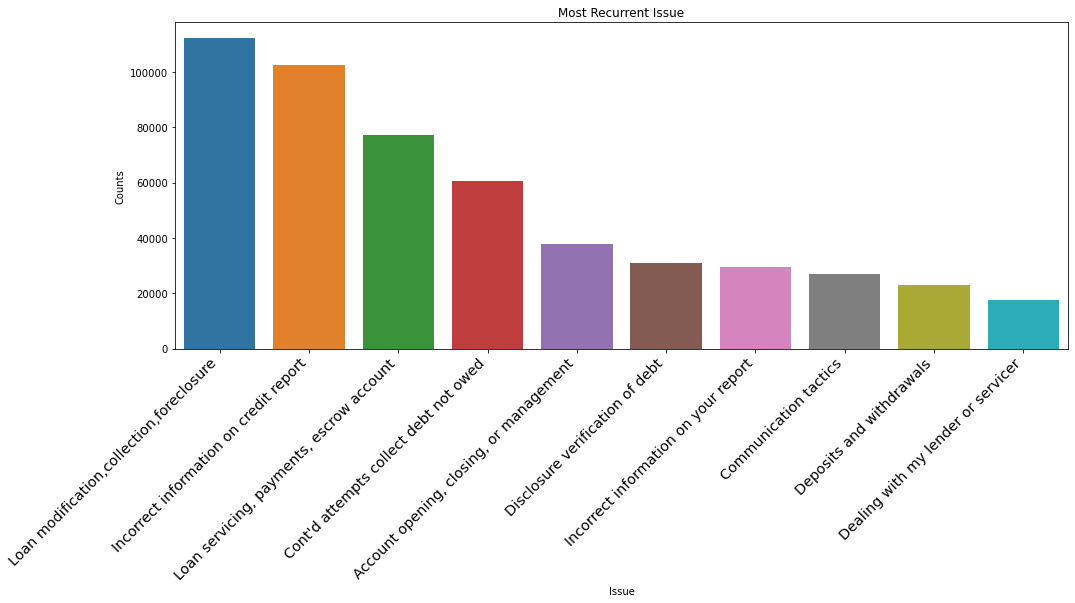

In [17]:
plt.figure(figsize = (16,6))
plt.title("Most Recurrent Issue")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot(x = df1['Issue'],  y = df1['Counts'])


In [18]:
df2=complaints['Sub-issue'].value_counts()[0:10]

In [19]:
df3=pd.DataFrame(df2)

In [20]:
df3.rename(columns={'Sub-issue':'Counts'},inplace=True)

In [21]:
df3.index.name='Sub-issue'

In [22]:
df3.reset_index(inplace=True)

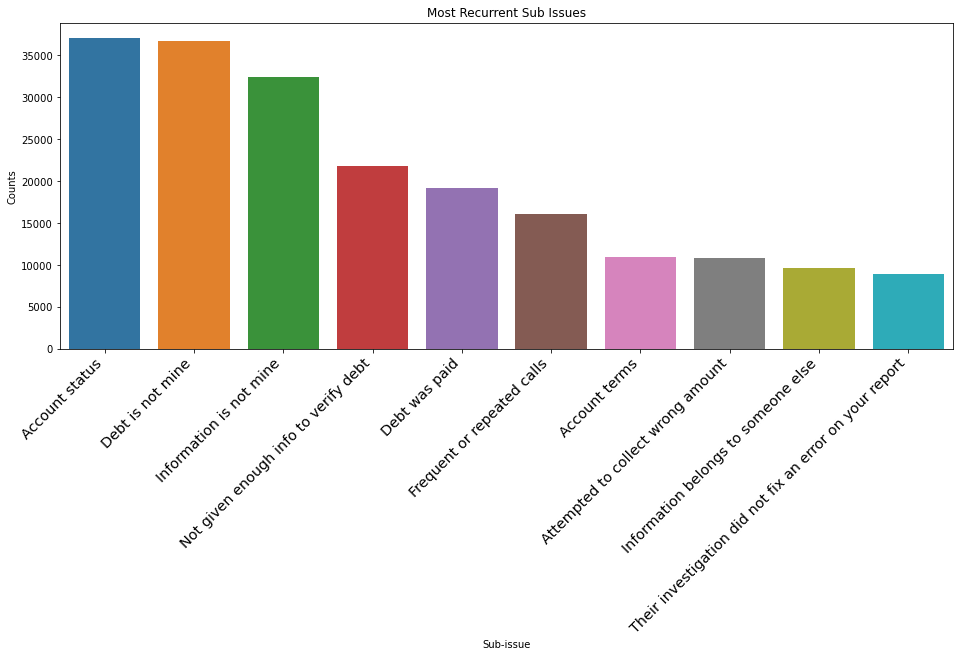

In [23]:
plt.figure(figsize = (16,6))
plt.title("Most Recurrent Sub Issues")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot(x = df3['Sub-issue'],  y = df3['Counts'])

In [24]:
complaints['Date received'].dtype

dtype('O')

In [25]:
complaints['Date']=pd.to_datetime(complaints['Date received'])

In [26]:
complaints['Date'].dtype

dtype('<M8[ns]')

In [27]:
complaints['Year']=complaints['Date'].dt.year

In [28]:
complaints['Month']=complaints['Date'].dt.month_name()

In [29]:
complaints['Weekdays']=complaints['Date'].dt.day_name()

In [30]:
complaints.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Date,Year,Month,Weekdays
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,...,Referral,3/17/2014,Closed with explanation,Yes,No,759217,2014-03-12,2014,March,Wednesday
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,...,Web,10/5/2016,Closed with explanation,Yes,No,2141773,2016-10-01,2016,October,Saturday
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,...,Web,10/20/2016,Closed with explanation,Yes,No,2163100,2016-10-17,2016,October,Monday
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,...,Web,6/10/2014,Closed with explanation,Yes,Yes,885638,2014-06-08,2014,June,Sunday
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,...,Web,9/13/2014,Closed with explanation,Yes,Yes,1027760,2014-09-13,2014,September,Saturday


In [31]:
complaints['Weekdays']

0         Wednesday
1          Saturday
2            Monday
3            Sunday
4          Saturday
            ...    
903978       Monday
903979      Tuesday
903980    Wednesday
903981       Monday
903982       Friday
Name: Weekdays, Length: 903983, dtype: object

In [32]:
weekday=complaints['Weekdays'].value_counts()[0:10]

In [33]:
weekdays=pd.DataFrame(weekday)

In [34]:
weekdays

,Weekdays
Wednesday,173178
Tuesday,171604
Thursday,165464
Friday,150244
Monday,144829
Saturday,56669
Sunday,41995


In [35]:
weekdays.rename(columns={'Weekdays':'Counts'},inplace=True)

In [36]:
weekdays.index.name='Days'

In [37]:
weekdays.reset_index(inplace=True)

In [38]:
weekdays

,Days,Counts
0,Wednesday,173178
1,Tuesday,171604
2,Thursday,165464
3,Friday,150244
4,Monday,144829
5,Saturday,56669
6,Sunday,41995


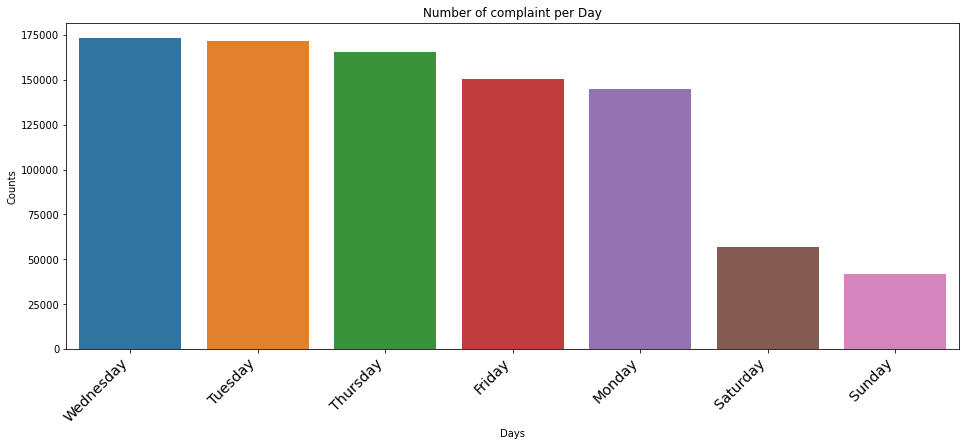

In [39]:
plt.figure(figsize = (16,6))
plt.title("Number of complaint per Day")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot(x = weekdays['Days'],  y = weekdays['Counts'])

In [194]:
Month=complaints['Month'].value_counts()
Month=pd.DataFrame(Month)
Month.rename(columns={'Month':'Counts'},inplace=True)
Month.index.name='Month'
Month.reset_index(inplace=True)

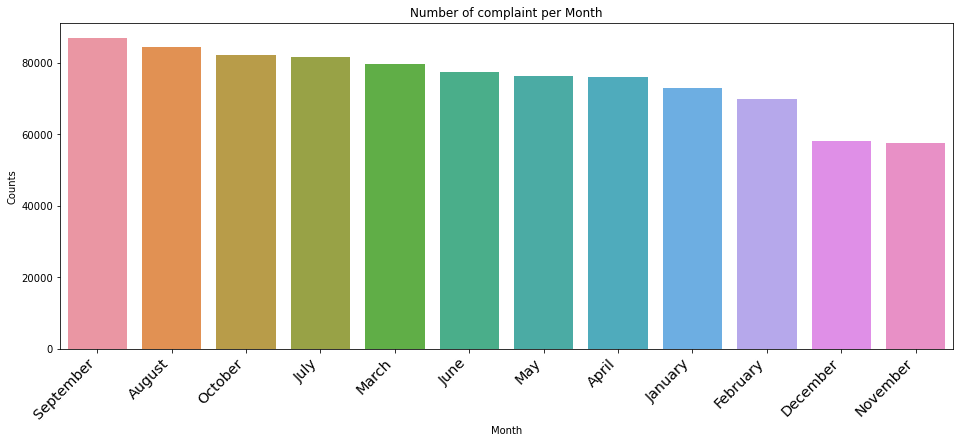

In [195]:
plt.figure(figsize = (16,6))
plt.title("Number of complaint per Month")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot(x = Month['Month'],  y = Month['Counts'])

In [42]:
Year=complaints['Year'].value_counts()[0:10]
Year=pd.DataFrame(Year)
Year.rename(columns={'Year':'Counts'},inplace=True)
Year.index.name='Year'
Year.reset_index(inplace=True)

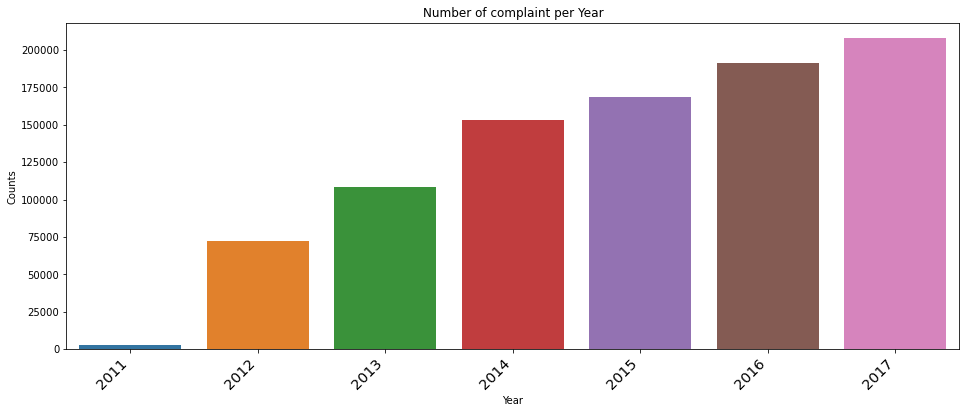

In [43]:
plt.figure(figsize = (16,6))
plt.title("Number of complaint per Year")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot(x = Year['Year'],  y = Year['Counts'])

In [44]:
complaints['Company response to consumer'].value_counts()

Closed with explanation            686039
Closed with non-monetary relief    108436
Closed with monetary relief         57090
Closed without relief               17868
Closed                              17611
In progress                          7015
Closed with relief                   5304
Untimely response                    4620
Name: Company response to consumer, dtype: int64

In [45]:
df5=pd.DataFrame(complaints['Company response to consumer'].value_counts())

In [46]:
df5.head()

,Company response to consumer
Closed with explanation,686039
Closed with non-monetary relief,108436
Closed with monetary relief,57090
Closed without relief,17868
Closed,17611


In [47]:
df5.rename(columns={'Company response to consumer':'Counts'},inplace=True)

In [48]:
df5.reset_index()

,index,Counts
0,Closed with explanation,686039
1,Closed with non-monetary relief,108436
2,Closed with monetary relief,57090
3,Closed without relief,17868
4,Closed,17611
5,In progress,7015
6,Closed with relief,5304
7,Untimely response,4620


In [56]:
df6=df5.reset_index()
df6.head()

,index,Counts
0,Closed with explanation,686039
1,Closed with non-monetary relief,108436
2,Closed with monetary relief,57090
3,Closed without relief,17868
4,Closed,17611


In [61]:
df6.rename(columns={'index':'Company response to consumer'},inplace=True)

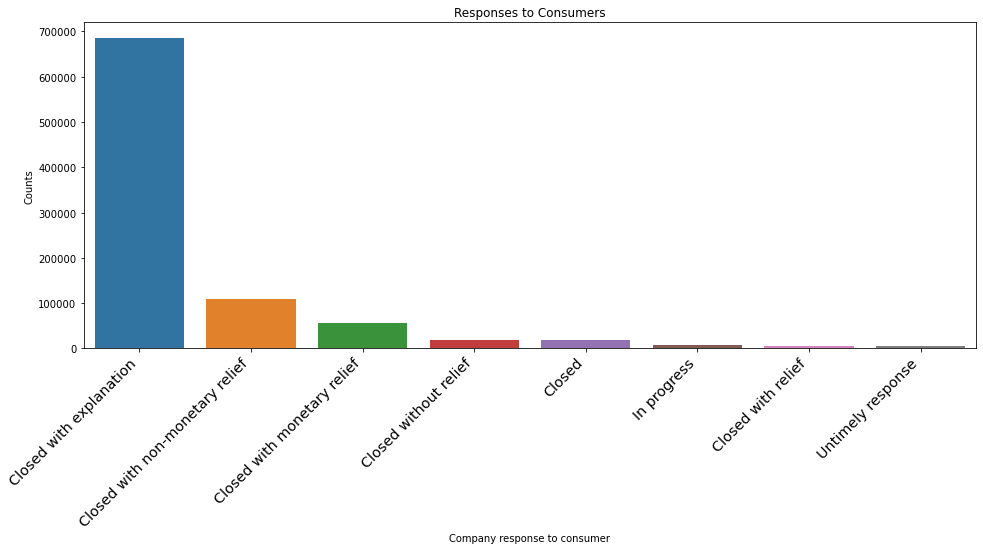

In [64]:
plt.figure(figsize = (16,6))
plt.title("Responses to Consumers")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot(x = df6['Company response to consumer'],  y = df6['Counts'])

In [ ]:
df6.columns

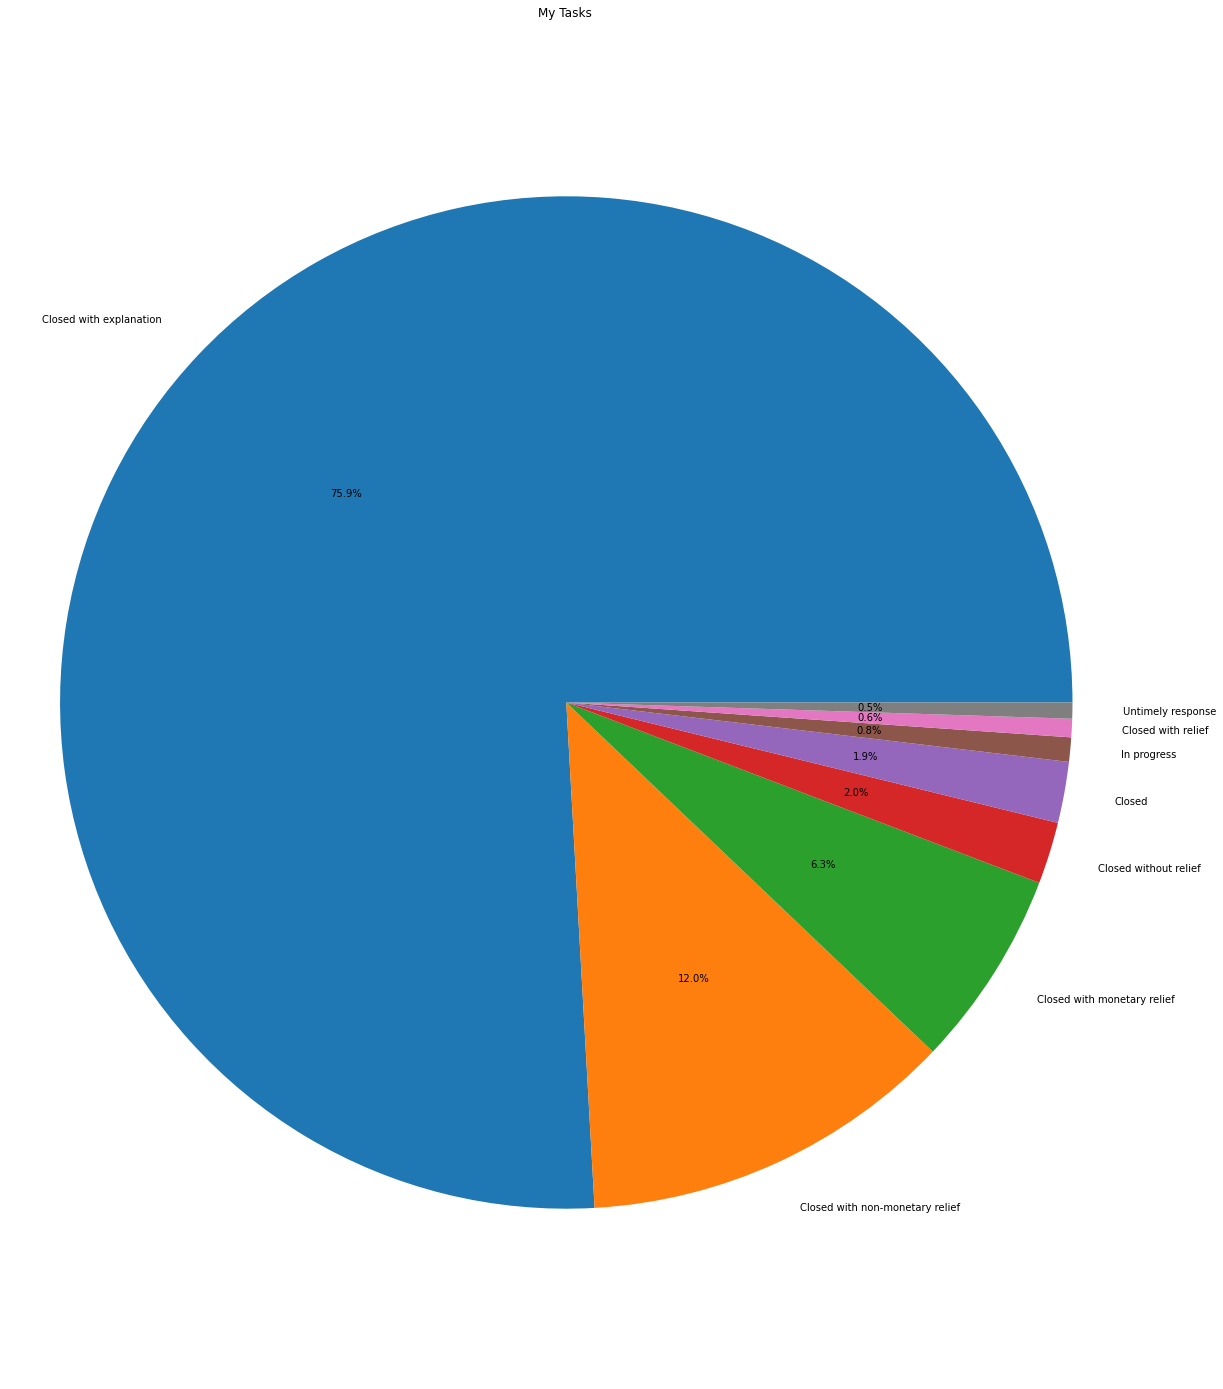

In [65]:
plt.figure(figsize = (20,25))
plt.pie(df6['Counts'],labels=df6['Company response to consumer'],autopct='%1.1f%%',radius=1.2)
plt.title('My Tasks')
plt.axis('equal')
plt.show()

In [ ]:
complaints.head()

In [66]:
df7=complaints['State'].value_counts()[0:10]

In [67]:
State_count=pd.DataFrame(df7)


In [68]:
State_count.rename(columns={'State':'Counts'},inplace=True)

In [69]:
State_counts=State_count.reset_index()

In [70]:
State_counts.rename(columns={'index':'State'},inplace=True)

In [71]:
State_counts

,State,Counts
0,CA,128373
1,FL,85837
2,TX,71751
3,NY,60975
4,GA,44664
5,NJ,34886
6,IL,33635
7,PA,31646
8,VA,28144
9,MD,27765


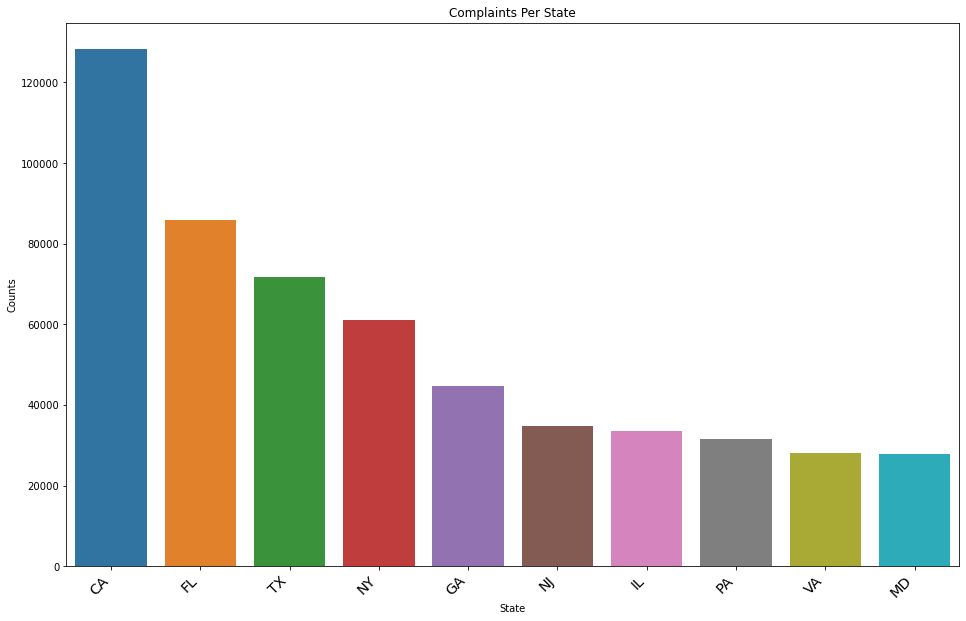

In [198]:
plt.figure(figsize = (16,10))
plt.title("Complaints Per State")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot(x = State_counts['State'],  y = State_counts['Counts'])

In [73]:
complaints.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Date,Year,Month,Weekdays
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,...,Referral,3/17/2014,Closed with explanation,Yes,No,759217,2014-03-12,2014,March,Wednesday
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,...,Web,10/5/2016,Closed with explanation,Yes,No,2141773,2016-10-01,2016,October,Saturday
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,...,Web,10/20/2016,Closed with explanation,Yes,No,2163100,2016-10-17,2016,October,Monday
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,...,Web,6/10/2014,Closed with explanation,Yes,Yes,885638,2014-06-08,2014,June,Sunday
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,...,Web,9/13/2014,Closed with explanation,Yes,Yes,1027760,2014-09-13,2014,September,Saturday


In [74]:
complaints[['Company','Timely response?']]

,Company,Timely response?
0,M&T BANK CORPORATION,Yes
1,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Yes
2,"CITIZENS FINANCIAL GROUP, INC.",Yes
3,AMERICAN EXPRESS COMPANY,Yes
4,"CITIBANK, N.A.",Yes
...,...,...
903978,PENTAGON FEDERAL CREDIT UNION,Yes
903979,ERC,Yes
903980,"Caliber Home Loans, Inc.",Yes
903981,"Progressive Financial Services, Inc.",Yes


In [75]:
def replace(x):
    if x=='Yes':
        return 1
    elif x=='No':
        return 0


In [76]:
complaints['Timely response?']=complaints['Timely response?'].apply(replace)

In [77]:
complaints[['Company','Timely response?']]

,Company,Timely response?
0,M&T BANK CORPORATION,1
1,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",1
2,"CITIZENS FINANCIAL GROUP, INC.",1
3,AMERICAN EXPRESS COMPANY,1
4,"CITIBANK, N.A.",1
...,...,...
903978,PENTAGON FEDERAL CREDIT UNION,1
903979,ERC,1
903980,"Caliber Home Loans, Inc.",1
903981,"Progressive Financial Services, Inc.",1


In [78]:
new=complaints.groupby('Company').agg({'Timely response?':np.sum})

In [79]:
df8=new.sort_values(by=['Timely response?'],ascending=False).head(10)

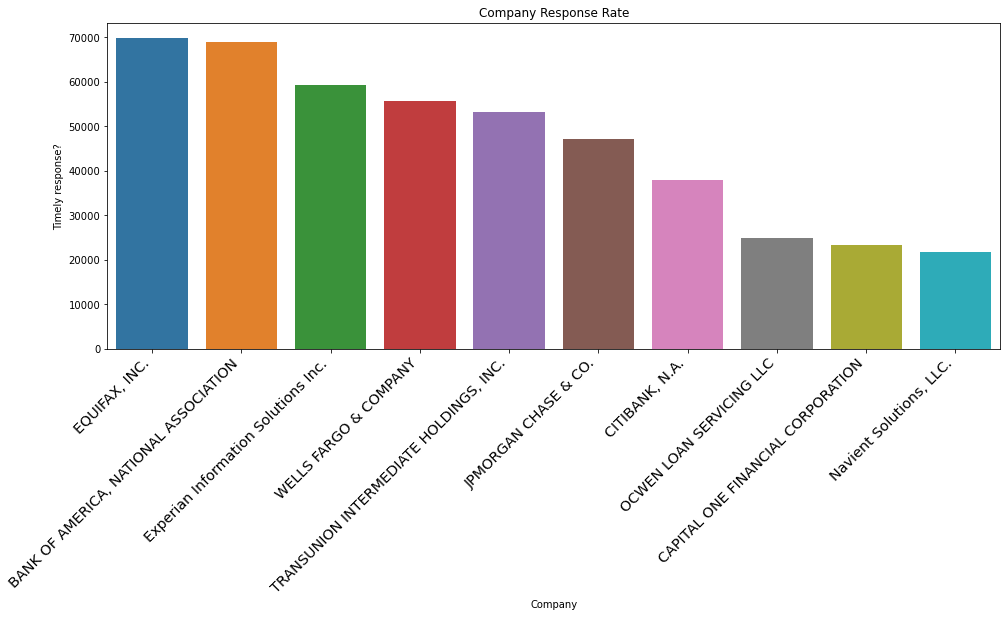

In [211]:
plt.figure(figsize = (16,6))
plt.title("Company Response Rate")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot(x = df8.index,  y = df8['Timely response?'])

In [81]:
complaints.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Date,Year,Month,Weekdays
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,...,Referral,3/17/2014,Closed with explanation,1,No,759217,2014-03-12,2014,March,Wednesday
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,...,Web,10/5/2016,Closed with explanation,1,No,2141773,2016-10-01,2016,October,Saturday
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,...,Web,10/20/2016,Closed with explanation,1,No,2163100,2016-10-17,2016,October,Monday
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,...,Web,6/10/2014,Closed with explanation,1,Yes,885638,2014-06-08,2014,June,Sunday
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,...,Web,9/13/2014,Closed with explanation,1,Yes,1027760,2014-09-13,2014,September,Saturday


In [82]:
new['complaints']=complaints['Company'].value_counts()

In [83]:
new.sort_values(by=['complaints','Timely response?'],ascending=False)

,Timely response?,complaints
Company,,
"BANK OF AMERICA, NATIONAL ASSOCIATION",68918,70488
"EQUIFAX, INC.",69800,70341
Experian Information Solutions Inc.,59304,59311
WELLS FARGO & COMPANY,55625,58440
"TRANSUNION INTERMEDIATE HOLDINGS, INC.",53360,53423
...,...,...
Williams Kastner & Gibbs PLLC,0,1
"World Wide Pay Day Advance, Inc",0,1
"Xapo, Inc.",0,1


In [84]:
new1=new.reset_index()

In [86]:
new2=new1.sort_values(by=['complaints','Timely response?'],ascending=False).head(10)

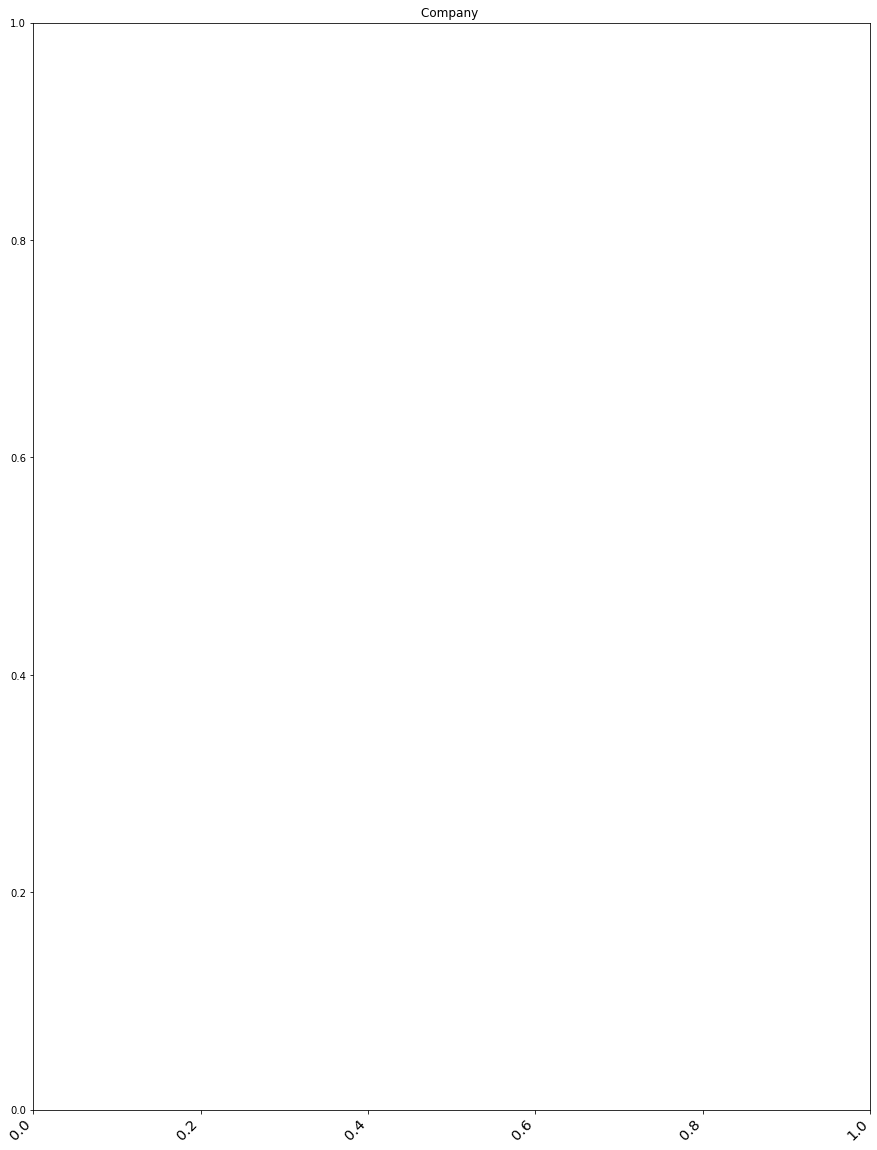

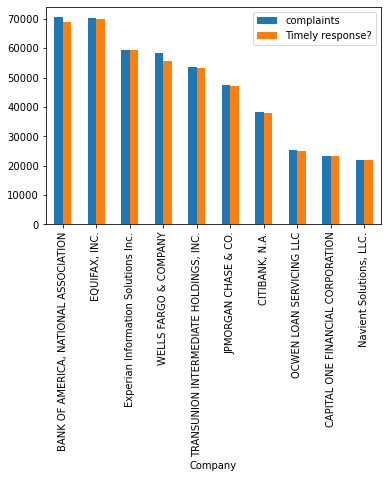

In [92]:
plt.figure(figsize=(15,20))
plt.title("Company ")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
new2.plot(x = 'Company',  y = ['complaints','Timely response?'],kind='bar')


In [93]:
complaints.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Date,Year,Month,Weekdays
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,...,Referral,3/17/2014,Closed with explanation,1,No,759217,2014-03-12,2014,March,Wednesday
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,...,Web,10/5/2016,Closed with explanation,1,No,2141773,2016-10-01,2016,October,Saturday
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,...,Web,10/20/2016,Closed with explanation,1,No,2163100,2016-10-17,2016,October,Monday
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,...,Web,6/10/2014,Closed with explanation,1,Yes,885638,2014-06-08,2014,June,Sunday
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,...,Web,9/13/2014,Closed with explanation,1,Yes,1027760,2014-09-13,2014,September,Saturday


In [94]:
newcomp=complaints.groupby(['Company','Submitted via']).agg({'Timely response?':np.sum})

In [95]:
newcomp.head()

Timely response?
Company                                  Submitted via                  
(Former)Shapiro, Swertfeger & Hasty, LLP Referral                      0
                                         Web                           0
1 STOP MONEY CENTERS, LLC                Web                           1
1ST 2ND MORTGAGE CO. OF NJ INC           Referral                      0
                                         Web                           1

In [96]:
comp=newcomp.reset_index()

In [97]:
newcomp=comp.sort_values(['Timely response?'])

In [134]:
comps1=newcomp.sort_values('Timely response?',ascending=False).head(100)

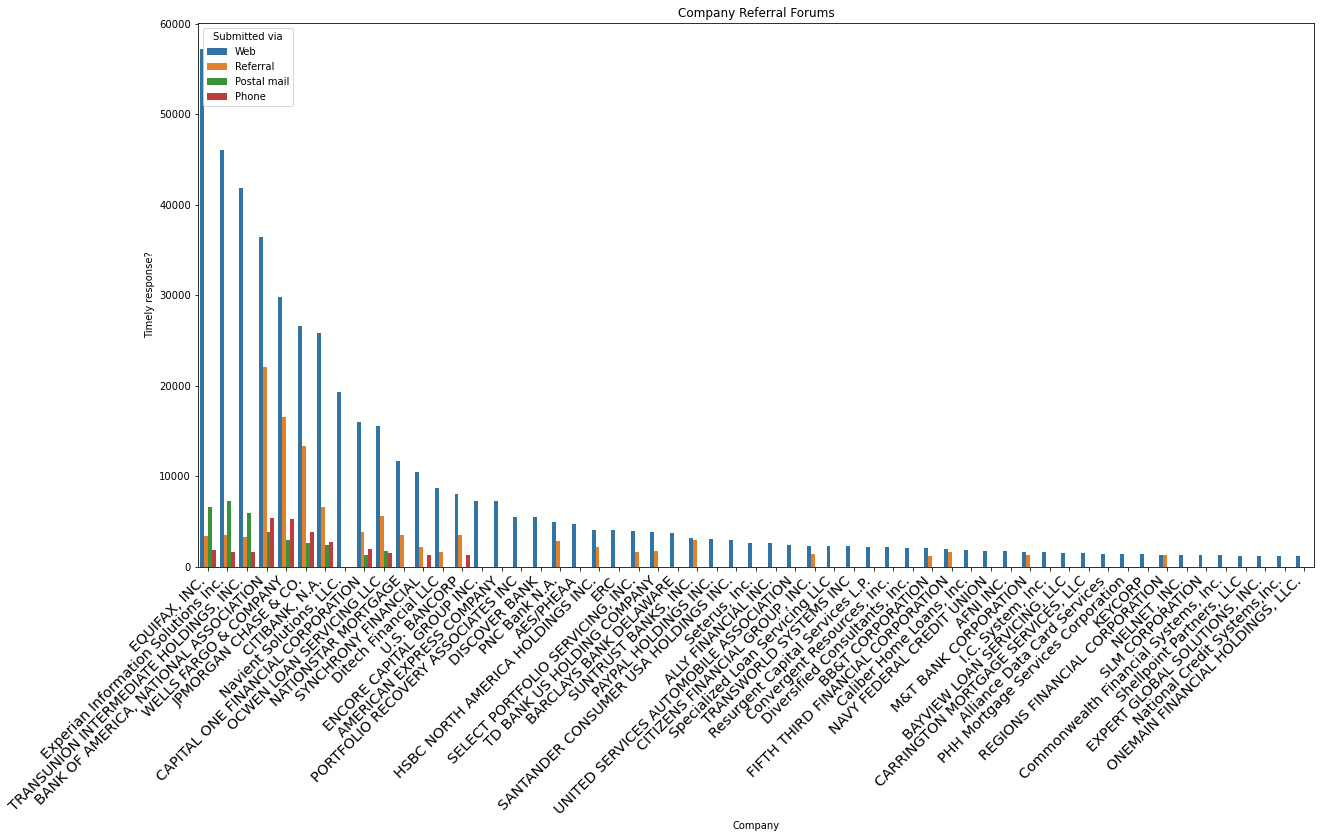

In [136]:
plt.figure(figsize=(20,10))
plt.title("Company Referral Forums")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot(x=comps1['Company'],y=comps1['Timely response?'],hue=comps1['Submitted via'])

In [137]:
complaints.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Date,Year,Month,Weekdays
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,...,Referral,3/17/2014,Closed with explanation,1,No,759217,2014-03-12,2014,March,Wednesday
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,...,Web,10/5/2016,Closed with explanation,1,No,2141773,2016-10-01,2016,October,Saturday
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,...,Web,10/20/2016,Closed with explanation,1,No,2163100,2016-10-17,2016,October,Monday
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,...,Web,6/10/2014,Closed with explanation,1,Yes,885638,2014-06-08,2014,June,Sunday
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,...,Web,9/13/2014,Closed with explanation,1,Yes,1027760,2014-09-13,2014,September,Saturday


In [151]:
dispute['Consumer disputed?']=complaints['Consumer disputed?'].apply(replace)

<ipython-input-151-16e8e20bd70a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dispute['Consumer disputed?']=complaints['Consumer disputed?'].apply(replace)


In [161]:
virtual=complaints[(complaints['Product']=='Virtual currency') & (complaints['Consumer disputed?']==1)]

In [162]:
virtual.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Date,Year,Month,Weekdays
128273,11/29/2016,Virtual currency,Domestic (US) money transfer,Other service issues,NaN,I opened an online account with Coinbase to pu...,Company believes it acted appropriately as aut...,"Coinbase, Inc.",AL,356XX,...,Web,11/29/2016,Closed with explanation,1,1.0,2230190,2016-11-29,2016,November,Tuesday
213829,10/22/2015,Virtual currency,Domestic (US) money transfer,Fraud or scam,NaN,Signedup XXXX family members for referrals on ...,NaN,"Coinbase, Inc.",MN,553XX,...,Web,10/22/2015,Closed with explanation,1,1.0,1621079,2015-10-22,2015,October,Thursday
228785,3/11/2016,Virtual currency,Domestic (US) money transfer,Other service issues,NaN,I received a random notice 3 days ago from a d...,Company disputes the facts presented in the co...,Circle Internet Financial,PA,193XX,...,Web,3/11/2016,Closed with explanation,1,1.0,1825707,2016-03-11,2016,March,Friday
329482,10/21/2016,Virtual currency,Domestic (US) money transfer,Other service issues,NaN,"I applied for an account on "" Circle '' and th...",Company believes it acted appropriately as aut...,Circle Internet Financial,MD,207XX,...,Web,10/21/2016,Closed with explanation,1,1.0,2170551,2016-10-21,2016,October,Friday
338642,10/26/2016,Virtual currency,Domestic (US) money transfer,Other transaction issues,NaN,NaN,Company believes it acted appropriately as aut...,Circle Internet Financial,MN,55432,...,Web,10/26/2016,Closed with explanation,1,1.0,2180024,2016-10-26,2016,October,Wednesday


In [163]:
virtual['Sub-product'].value_counts()

Domestic (US) money transfer    9
Name: Sub-product, dtype: int64

In [164]:
virtual['Company'].value_counts()

Coinbase, Inc.               6
Circle Internet Financial    3
Name: Company, dtype: int64

In [171]:
dispute=complaints[(complaints['Consumer disputed?']==1)]

In [172]:
dispute.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Date,Year,Month,Weekdays
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,...,Web,6/10/2014,Closed with explanation,1,1.0,885638,2014-06-08,2014,June,Sunday
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,...,Web,9/13/2014,Closed with explanation,1,1.0,1027760,2014-09-13,2014,September,Saturday
8,11/13/2015,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Aldridge Pite, LLP",CA,93101,...,Referral,12/10/2015,Closed with explanation,1,1.0,1654890,2015-11-13,2015,November,Friday
12,2/3/2016,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,This company refuses to provide me verificatio...,NaN,"The CBE Group, Inc.",TX,752XX,...,Web,2/3/2016,Closed with explanation,1,1.0,1772196,2016-02-03,2016,February,Wednesday
13,1/7/2015,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Experian Information Solutions Inc.,NV,89169,...,Referral,1/23/2015,Closed with explanation,1,1.0,1184859,2015-01-07,2015,January,Wednesday


In [173]:
dispute['Product'].value_counts()

Mortgage                   51369
Debt collection            25634
Credit reporting           22113
Credit card                18204
Bank account or service    16028
Consumer Loan               6771
Student loan                5936
Payday loan                  797
Money transfers              782
Prepaid card                 536
Other financial service      199
Virtual currency               9
Name: Product, dtype: int64

In [178]:
cons_dispute=dispute.groupby(['Product']).agg({'Consumer disputed?':np.sum})
cons_dispute.head()


,Consumer disputed?
Product,
Bank account or service,16028.0
Consumer Loan,6771.0
Credit card,18204.0
Credit reporting,22113.0
Debt collection,25634.0


In [179]:
dis=cons_dispute.reset_index()

In [181]:
dis.columns

Index(['Product', 'Consumer disputed?'], dtype='object')

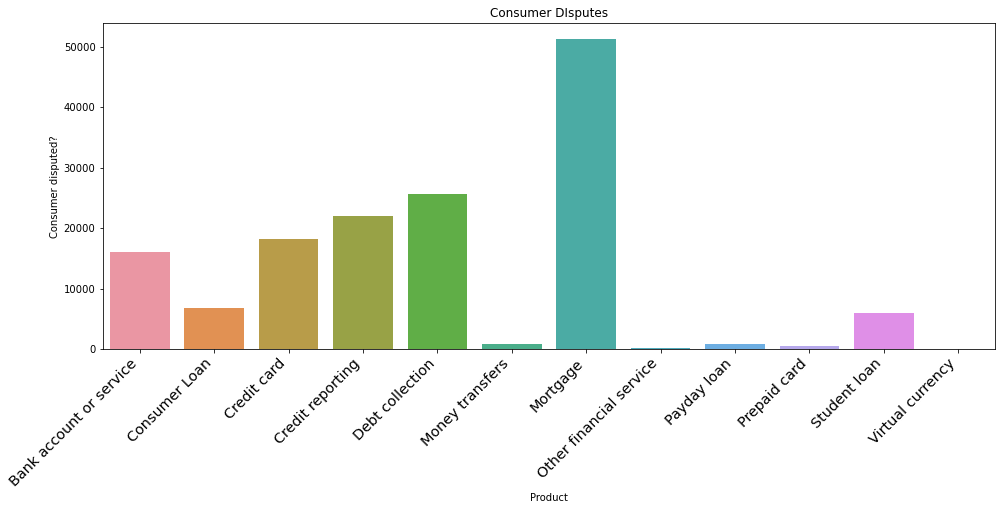

In [200]:
plt.figure(figsize=(16,6))
plt.title("Consumer DIsputes")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot(x=dis['Product'],y=dis['Consumer disputed?'])

In [187]:
v1=dispute.groupby(['Product','Company']).agg({'Consumer disputed?':np.sum})
v1.head()

Consumer disputed?
Product                 Company                                                   
Bank account or service ALLY FINANCIAL INC.                                  106.0
                        AMERICAN EXPRESS COMPANY                             100.0
                        AMERINATIONAL COMMUNITY SERVICES, INC.                 1.0
                        AMERISAVE MORTGAGE CORPORATION                         1.0
                        APPLE FINANCIAL HOLDINGS, INC.                         2.0

In [191]:
v2=v1.reset_index()

In [205]:
v3=v2[v2['Product']=='Mortgage']

In [209]:
v3.sort_values(['Consumer disputed?'],ascending=False)

,Product,Company,Consumer disputed?
2937,Mortgage,"BANK OF AMERICA, NATIONAL ASSOCIATION",9421.0
3434,Mortgage,WELLS FARGO & COMPANY,7072.0
3260,Mortgage,OCWEN LOAN SERVICING LLC,5529.0
3154,Mortgage,JPMORGAN CHASE & CO.,3962.0
3237,Mortgage,NATIONSTAR MORTGAGE,3659.0
...,...,...,...
3250,Mortgage,NVR INC.,22.0
3029,Mortgage,EMBRACE HOME LOANS,22.0
3153,Mortgage,JAMES B. NUTTER & COMPANY,22.0
2966,Mortgage,CARDINAL FINANCIAL COMPANY,22.0
